Dataset size: (96, 9)


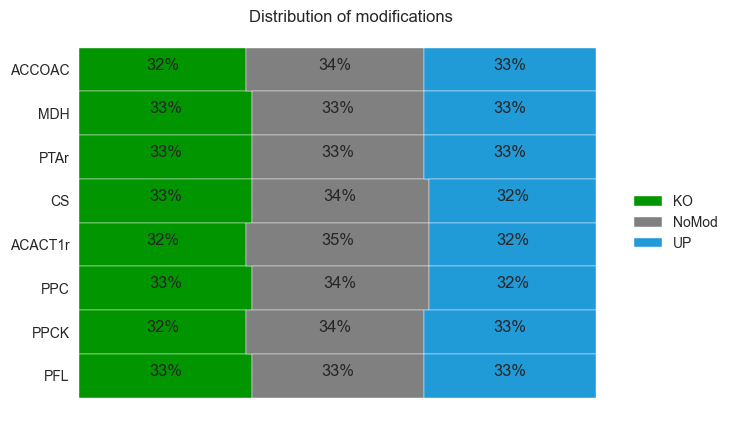

In [5]:
import sys

sys.path.append("../")

import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from src import plot_multiomics
from straindesignxai.main import DataLoader

file_path = "../data/EDD_isoprenol_production.csv"
model_path = "../models/xgb_isoprenol.pkl"

input_var = ["ACCOAC", "MDH", "PTAr", "CS", "ACACT1r", "PPC", "PPCK", "PFL"]
response_var = ["Value"]

d = DataLoader(file_path, input_var, response_var)
plot_multiomics.plot_distribution_of_designs(d.df.drop('Value', axis=1))

In [6]:
# How many designs improve production over the WT
print(len(d.df[d.df['Value'] > d.df.loc['WT']['Value']]), 'designs out of', len(d.df), 'improve production over the WT')

11 designs out of 96 improve production over the WT


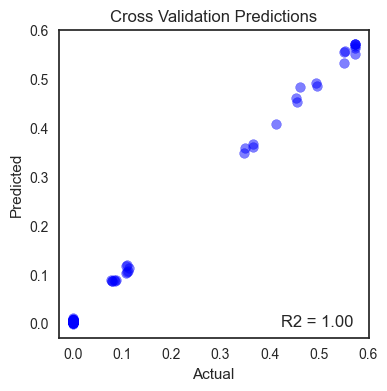

In [7]:
# load or train ml model
try:
    d.load_model(model_path)
except FileNotFoundError:
    d.train_xgb(n_iter=500)
    d.save_model(model_path)

d.plot_R2()

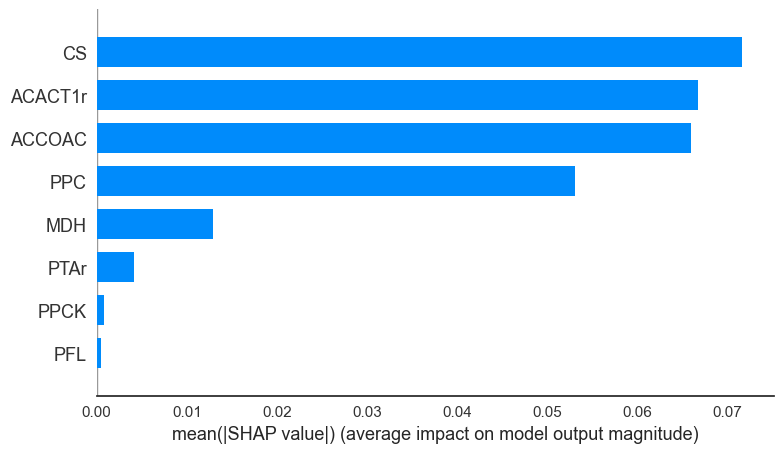

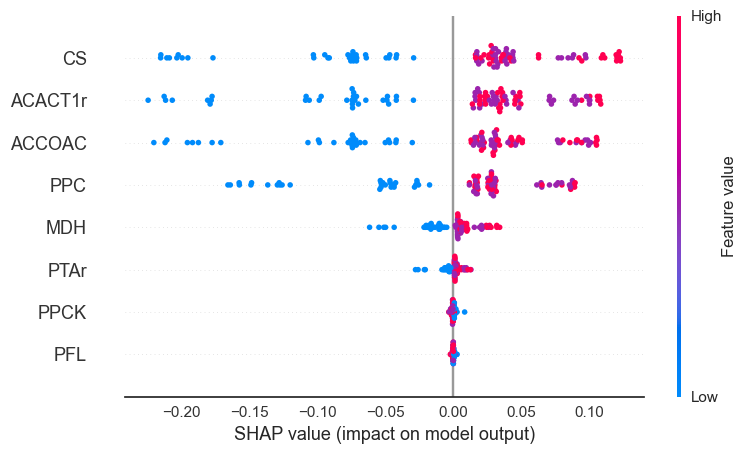

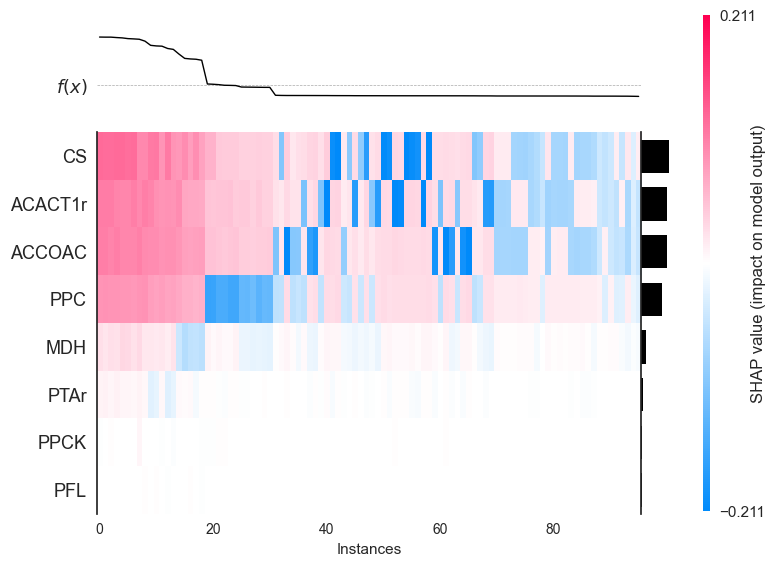

In [8]:
d.get_shap_values()

### Sort columns of `shap_df` by absolute `mean`/`man` shap values

In [9]:
# Sort columns of d.shap_df by mean absolute shap value
d.shap_df = d.shap_df.reindex(np.abs(d.shap_df).mean().sort_values(ascending=False).index, axis=1)
np.abs(d.shap_df).describe().loc['max']

CS         0.215608
ACACT1r    0.224800
ACCOAC     0.220575
PPC        0.166008
MDH        0.061654
PTAr       0.027843
PPCK       0.008366
PFL        0.002814
Name: max, dtype: float64

### Supervised clusterin

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

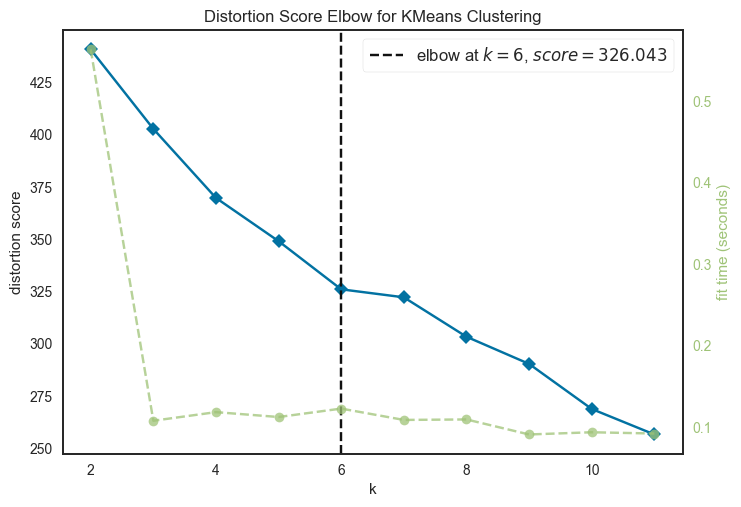

Optimal number of clusters: 6
Number of elements in each cluster: 
3    31
0    19
1    13
4    12
5    12
2     9
Name: cluster, dtype: int64


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value
cluster,,,,,,,,,
0,1.473684,1.157895,1.052632,1.631579,1.368421,1.315789,1.000000,1.052632,0.489407
1,1.538462,0.846154,1.153846,1.615385,0.000000,0.923077,1.153846,1.000000,0.000000
2,1.222222,1.333333,0.666667,0.000000,1.777778,1.777778,1.222222,0.666667,0.000000
3,0.612903,1.032258,1.032258,0.387097,0.612903,0.967742,0.967742,1.129032,0.000000
4,1.583333,0.750000,1.083333,1.166667,1.500000,0.000000,0.916667,1.000000,0.096391
5,0.000000,0.833333,0.833333,1.416667,1.416667,1.000000,0.916667,0.833333,0.000000


In [10]:
d.supervised_clustering()
d.study_clusters()

In [11]:
d.study_clusters("most_frequent")

Number of elements in each cluster: 
3    31
0    19
1    13
4    12
5    12
2     9
Name: cluster, dtype: int64


,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value
cluster,,,,,,,,,
0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.552101
1,2.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.000000
2,1.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,0.000000
3,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.000000
4,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.080117
5,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.000000


In [12]:
d.df[d.df['cluster'] == 6]

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value,cluster
Line Name,,,,,,,,,,


### Partial Dependence and Scatter Plots

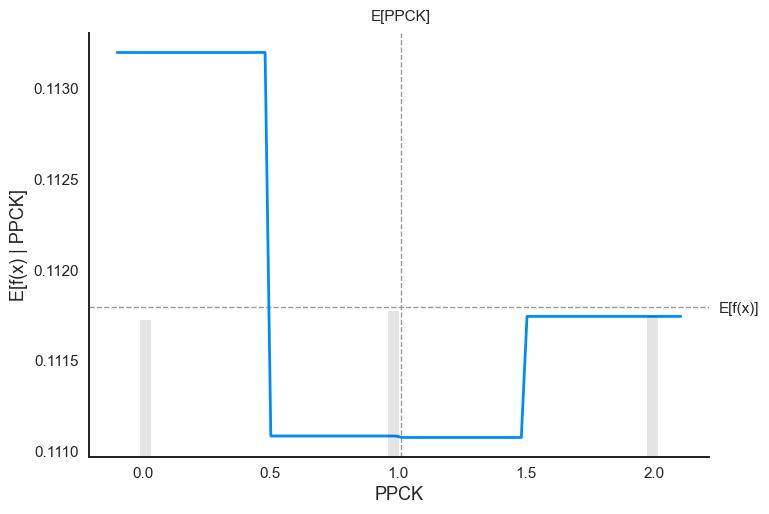

In [13]:
d.pdplot("PPCK")

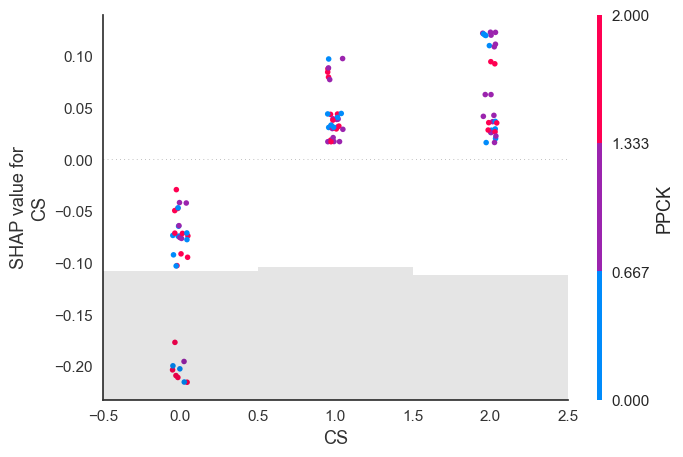

In [14]:
d.shap_scatter("CS", "PPCK")

### Sampling

In [15]:
d.study_clusters()

Number of elements in each cluster: 
3    31
0    19
1    13
4    12
5    12
2     9
Name: cluster, dtype: int64


,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value
cluster,,,,,,,,,
0,1.473684,1.157895,1.052632,1.631579,1.368421,1.315789,1.000000,1.052632,0.489407
1,1.538462,0.846154,1.153846,1.615385,0.000000,0.923077,1.153846,1.000000,0.000000
2,1.222222,1.333333,0.666667,0.000000,1.777778,1.777778,1.222222,0.666667,0.000000
3,0.612903,1.032258,1.032258,0.387097,0.612903,0.967742,0.967742,1.129032,0.000000
4,1.583333,0.750000,1.083333,1.166667,1.500000,0.000000,0.916667,1.000000,0.096391
5,0.000000,0.833333,0.833333,1.416667,1.416667,1.000000,0.916667,0.833333,0.000000


In [29]:
# Gerate samples from a Latin hypercube generator
from scipy.stats import qmc 

sampler = qmc.LatinHypercube(d=d.X.shape[1])
sample = sampler.random(100)

l_bounds = [0 for i in range(d.X.shape[1])]
u_bounds = [3 for i in range(d.X.shape[1])]

sample_df = pd.DataFrame(qmc.scale(sample, l_bounds, u_bounds), columns=d.X.columns)
sample_df = sample_df.round(0).astype(int)
sample_df['pred'] = d.model.predict(sample_df)
sample_df.sort_values('pred', ascending=False).head(10)

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,pred
57,2,2,3,2,3,3,3,1,0.576748
74,3,2,1,2,1,1,1,1,0.576683
28,2,2,1,2,2,2,0,0,0.575735
14,3,1,1,2,2,2,0,2,0.573857
95,2,1,1,3,2,2,0,2,0.573857
96,3,3,3,3,3,3,0,0,0.571565
21,2,1,1,2,3,2,1,2,0.571186
26,3,2,3,3,3,2,2,0,0.569647
76,2,2,2,2,2,2,2,0,0.569647
42,1,2,2,3,3,3,0,1,0.568693
